----Ques1.(a)----
---Plot---
Figure(720x504) AxesSubplot(0.125,0.125;0.775x0.755)
----Ques2.(b)----
The Pearson correlation (Autocorrelation) coefficient between given sequence and 1-day lag sequence is
0.9990644144715023
----Ques 1.(c)----


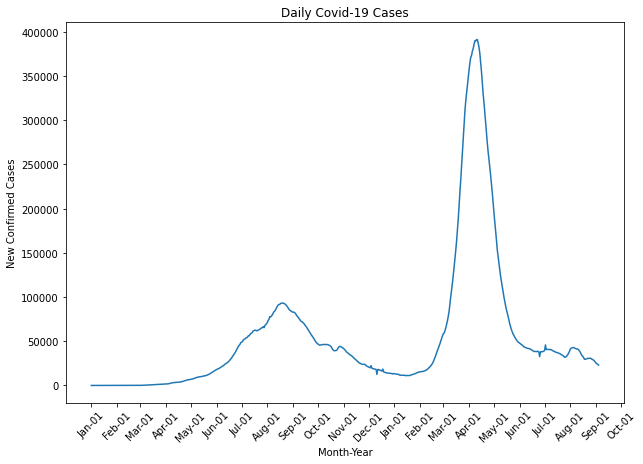

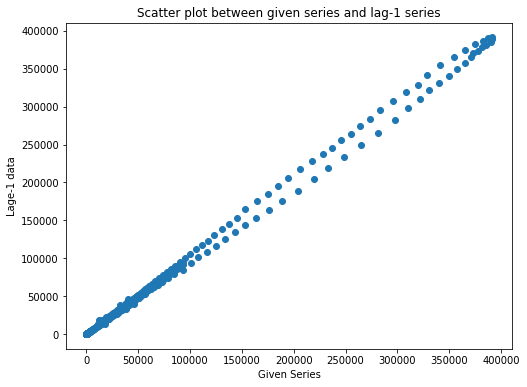

The data points are located around line y=x justifying the high autocorrelation of 0.99
----Ques 1.(d)----
----Line plot----


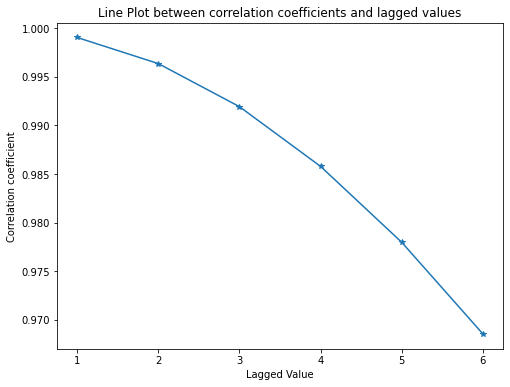

----Q1.(e)----
----acf plot----


<Figure size 576x432 with 0 Axes>

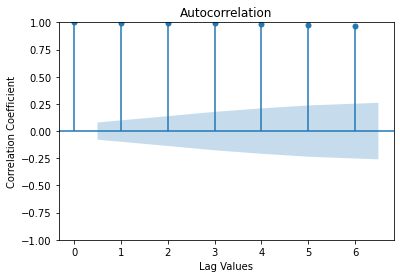

In [1]:
#Ujjwal Shaw

# In[1]:


import datetime
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from scipy.stats import pearsonr
import math
import numpy as np 


print("----Ques1.(a)----")
print("---Plot---")
df = pd.read_csv("daily_covid_cases.csv")
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(df["Date"],df["new_cases"])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation = 45)
plt.title("Daily Covid-19 Cases")
plt.xlabel("Month-Year")
plt.ylabel("New Confirmed Cases")
print(fig,ax)


# In[2]:


print("----Ques2.(b)----")
orig_data= df["new_cases"][1:]
lag1 = df["new_cases"][:611]
#rint(len(lag1),len(orig_data))
corr, _ =  pearsonr(orig_data,lag1)
print("The Pearson correlation (Autocorrelation) coefficient between given sequence and 1-day lag sequence is")
print(corr)


# In[3]:



print("----Ques 1.(c)----")
plt.figure(figsize=(8,6))
plt.scatter(orig_data, lag1)
plt.title("Scatter plot between given series and lag-1 series")
plt.xlabel("Given Series")

plt.ylabel("Lage-1 data")
plt.show()
print("The data points are located around line y=x justifying the high autocorrelation of 0.99")


# In[4]:


print("----Ques 1.(d)----")
print("----Line plot----")
lst = [1,2,3,4,5,6]
corr_list=[]
for i in lst:
    orig_data= df["new_cases"][i:]
    lag1 = df["new_cases"][:612-i]
    #rint(len(lag1),len(orig_data))
    corr, _ =  pearsonr(orig_data,lag1)
    corr_list.append(corr)
#print(corr_list)  
plt.figure(figsize=(8,6))
plt.plot(lst,corr_list, marker='*') 
plt.title("Line Plot between correlation coefficients and lagged values")
plt.xlabel("Lagged Value")
plt.ylabel("Correlation coefficient")
plt.show()


# In[5]:


print("----Q1.(e)----")
print("----acf plot----")
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(8,6))
plot_acf(df["new_cases"], lags=6)
plt.xlabel("Lag Values")
plt.ylabel("Correlation Coefficient")
plt.show()

----Q2.(a)----
The obtained coefficients are: 
 w0 =  59.954833284090526
 w1 =  1.0367593349641002
 w2 =  0.26171233587061016
 w3 =  0.027561262816080845
 w4 =  -0.17539195532509533
 w5 =  -0.1524613663764427
----Q2.(b)----
[array([14299.57143]), array([14656.]), array([15011.42857]), array([15198.71429]), array([15441.85714])]
----Q2.(b)i----


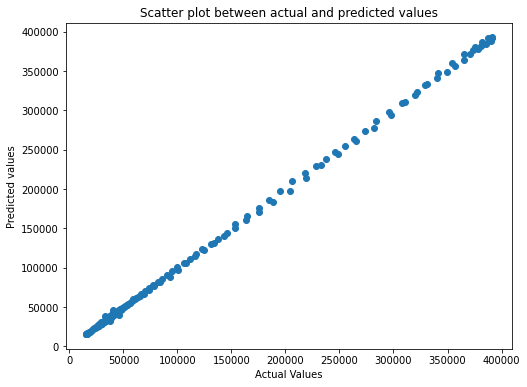

----Q2.(b)ii----


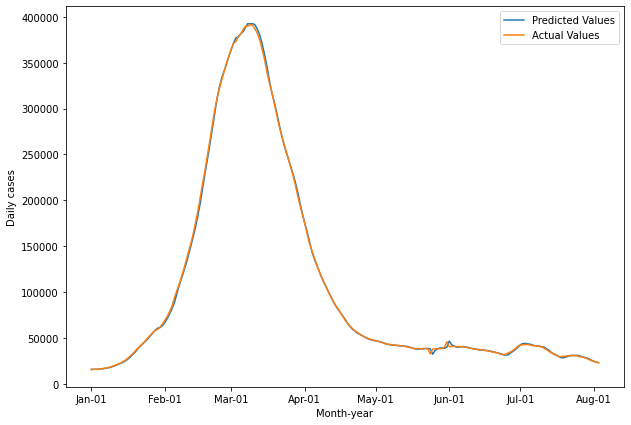

----Q2.(b)iii----

MAPE value:  1.574836382405824
RMSE value:  1.8247684769390475


In [2]:



print("----Q2.(a)----")
from statsmodels.tsa.ar_model import AutoReg as AR
series = pd.read_csv('daily_covid_cases.csv',parse_dates=['Date'],index_col=['Date'],sep=',')
test_size = 0.35 # 35% for testing
X = series.values
tst_sz = math.ceil(len(X)*test_size)
series_test = series[len(series)-tst_sz:]
train, test = X[:len(X)-tst_sz], X[len(X)-tst_sz:]
 
AR_model = AR(train, lags = 5,old_names=False).fit()
#print(len(train),len(test))
coef = AR_model.params
print("The obtained coefficients are: ")
for i in range(len(coef)):
    print(f" w{i} = ", coef[i])


# In[7]:


print("----Q2.(b)----")

#using these coefficients walk forward over time steps in test, one step each time
'''history = train[len(train)-window:]
print(history)
history = [history[i] for i in range(len(history))]
print(history)
'''
window = 5
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
print(history)

predictions = [] # List to hold the predictions, 1 step at a time
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0] # Initialize to w0
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1] # Add other values
    obs = test[t]
    predictions.append(yhat) #Append predictions to compute RMSE later
    history.append(obs)      # Append actual test value to history, to be used in next step.
print("----Q2.(b)i----")
#plt.figure(figsize = (10,8)) 
plt.figure(figsize=(8,6))
plt.scatter(test, predictions) 
plt.title("Scatter plot between actual and predicted values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.show()

print("----Q2.(b)ii----")
#plt.figure(figsize = (10,8))   
fig,ax = plt.subplots(figsize=(10,7))
series_test = df["Date"]
series_test = series_test[len(X)-tst_sz:]
plt.xlabel("Month-year")
plt.ylabel("Daily cases")
ax.plot(predictions, label = "Predicted Values")
ax.plot(series_test,test, label = "Actual Values")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.legend()
plt.show()

print("----Q2.(b)iii----")

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as MSE

def RMSE(y_act, y_pred):
    y_mean = np.mean(test)
    k = MSE(y_act,y_pred)
    RMSE = (k**0.5/y_mean) * 100
    return RMSE

print("")
print("MAPE value: ",mape(test, predictions)*100)
print("RMSE value: ",RMSE(test, predictions))




  

----Q3----


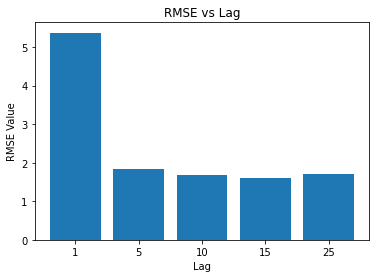

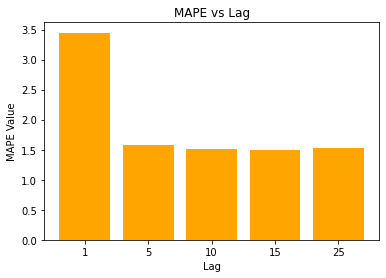

[5.372948489180813, 1.8247684769390475, 1.6855319348809568, 1.6119348114121463, 1.7033914119397486] [3.446540155208938, 1.574836382405824, 1.5193699431086947, 1.4962361178748689, 1.535420771825573]


In [3]:
#Ques3
    
MAPE_list=[]
RMSE_list =[]
print("----Q3----")
lst =[1,5,10,15,25]
for j in lst:
    window = j
    model = AR(train, lags=window,old_names=False)
    model_fit = model.fit() # fit/train the model
    coef = model_fit.params # Get the coefficients of AR model
    
    
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    #print(history)

    predictions = [] # List to hold the predictions, 1 step at a time
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0] # Initialize to w0
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1] # Add other values
        obs = test[t]
        predictions.append(yhat) #Append predictions to compute RMSE later
        history.append(obs)      # Append actual test value to history, to be used in next step.
        
    MAPE_list.append(mape(test, predictions)*100)
    RMSE_list.append(RMSE(test, predictions))
 

plt.bar(['1','5','10','15','25'],RMSE_list)
plt.xlabel("Lag")
plt.ylabel("RMSE Value")
plt.title("RMSE vs Lag")
plt.show()

plt.bar(['1','5','10','15','25'],MAPE_list,color = 'orange')
plt.xlabel("Lag")
plt.ylabel("MAPE Value")
plt.title("MAPE vs Lag")
plt.show()

print(RMSE_list,MAPE_list)





In [4]:


print("----Q4----")

train_q4=df.iloc[:int(len(df)*0.65)]
train_q4=train_q4['new_cases']
i=0
corr = 1
# abs(AutoCorrelation) > 2/sqrt(T)
while corr > 2/(len(train_q4))**0.5:
    i += 1
    t_new = train_q4.shift(i)
    corr = train_q4.corr(t_new)
#print(i)

window = i-1
model = AR(train, lags=window,old_names=False)
model_fit = model.fit() # fit/train the model
coef = model_fit.params # Get the coefficients of AR model
    
    
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
#print(history)

predictions = [] # List to hold the predictions, 1 step at a time
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0] # Initialize to w0
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1] # Add other values
    obs = test[t]
    predictions.append(yhat) #Append predictions to compute RMSE later
    history.append(obs)      # Append actual test value to history, to be used in next step.


    
print("Lag(heuristic) value is :", i-1)
print(f"RMSE value for lag value = {i-1} is :",RMSE(test, predictions))
print(f"MAPE value for lag value = {i-1} is :",mape(test, predictions)*100)  

----Q4----
Lag(heuristic) value is : 77
RMSE value for lag value = 77 is : 1.7593780528857617
MAPE value for lag value = 77 is : 2.0264439052823024
